<a href="https://colab.research.google.com/github/anujvaghani0/EDA-Hotel-Booking/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hotel Booking Demand EDA 
---



# **Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!</br>**
# **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.</br>**
# **Explore and analyze the data to discover important factors that govern the bookings.**

**The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)

In [2]:
url = 'https://raw.githubusercontent.com/salves94/hotel-exploratory-data-analysis/master/hotel_bookings.csv'
df = pd.read_csv(url)

## **We check how many rows has the dataset**


In [3]:
len(df.index)

119390

# **Data Description:**</br>
hotel : Hotel(Resort Hotel or City Hotel

is_canceled : Value indicating if the booking was canceled (1) or not (0)

lead_time :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

arrival_date_year : Year of arrival date

arrival_date_month : Month of arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults : Number of adults

children : Number of children

babies : Number of babies

meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

country : Country of origin.`

market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type : Code for the type of room assigned to the booking.

booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type : Indication on if the customer made a deposit to guarantee the booking.

agent : ID of the travel agency that made the booking

company : ID of the company/entity that made the booking or responsible for paying the booking.

days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type : Type of booking, assuming one of four categories

adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests :* Number of special requests made by the customer (e.g. twin bed or high floor)*

reservation_status : Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why
reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel 

**Now lets check how many cells are *missing* from our dataset.**


In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**We can see that we have 4 columns with missing values. Lets check these values as percentages.**

In [5]:
df.isnull().sum()/len(df.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

**The columns “agent” and “company” have a high percentage of missing values. As these columns won’t be relevant for our analysis, we can delete them.**

In [6]:
df=df.drop(['agent','company'],axis=1)

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


**The columns “children” and “country” have a low percentage of missing values. We will remove the full row on missing cells.**

In [8]:
df = df.dropna(axis = 0) # We delete rows with empty cells

In [9]:
df = df.drop(labels='days_in_waiting_list', axis=1) # We delete days_in_waiting_list column


In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

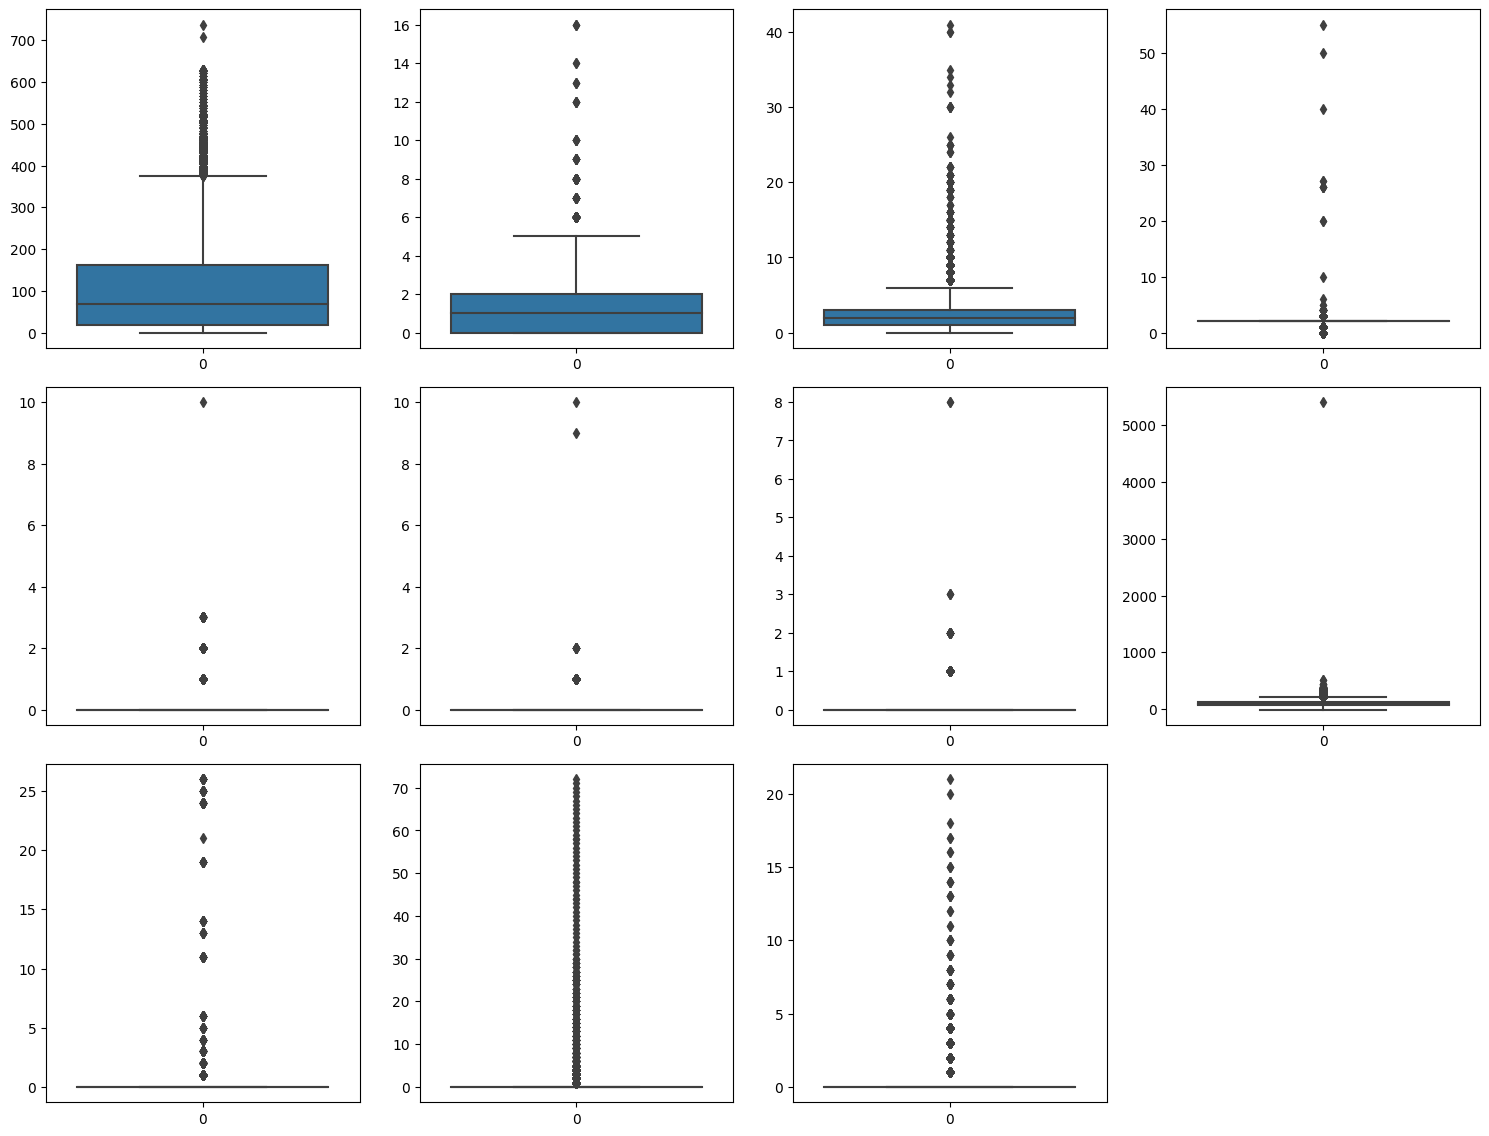

In [11]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(15,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

**We remove the outliers by using conditionals to get 
and update these values.**



In [12]:
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000

**We removed the outliers. Our data is clean now.**

### **Exploratory Analysis and Visualization**
In this section, we will explore the data to get insights about it.

Lets merge ‘children’ and ‘babies’ columns into ‘kids’ column.

Then, we set the string type to the corresponding columns.

In [13]:
df['kids'] = df.children + df.babies
#Combine total mumbers by adding kids and adults
df['total_members'] = df.kids + df.adults
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

**Lets convert arrival date to datetime**

In [14]:
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# **EDA (Exploratory Data Analysis)**

# **Univariate Analysis**</br>
# **1) Which type of hotel is mostly prefered by the guests?**

In [15]:
df.hotel.value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

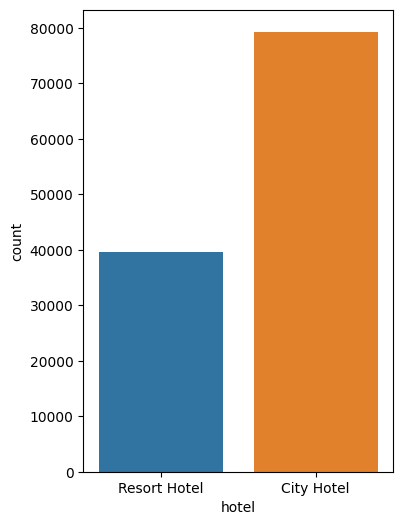

In [16]:
plt.figure(figsize=(4,6))

#City Hotel,Resort Hotel
sns.countplot(x='hotel',data=df)
plt.show()

# **Observation**
City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

# **2)What is the pecentage of cancellation?:**

In [17]:
print('Total Bookings cancelled')
print(df.is_canceled.value_counts())

Total Bookings cancelled
0    74745
1    44153
Name: is_canceled, dtype: int64


In [18]:
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True))

Cancelation percentage
0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


**Now lets plot this result.**

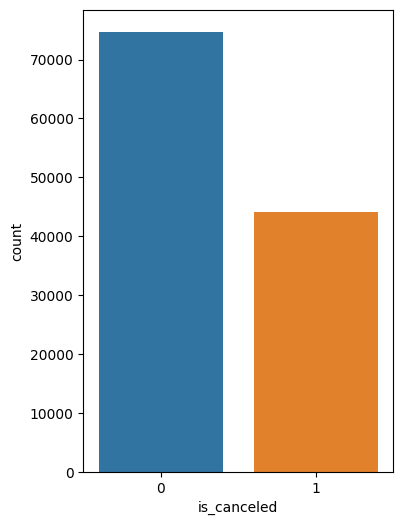

In [19]:
plt.figure(figsize=(4,6))

#Canceled=1, Not canceled= 0
sns.countplot(x='is_canceled',data=df)
plt.show()

#**Observation :**
0= not cancled</br>
1= canceled</br>
27.5 % of the bookings were cancelled.

# **3) What is the Percentage of repeated guests?**


In [20]:
print(df.is_repeated_guest.value_counts())

0    115092
1      3806
Name: is_repeated_guest, dtype: int64


Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

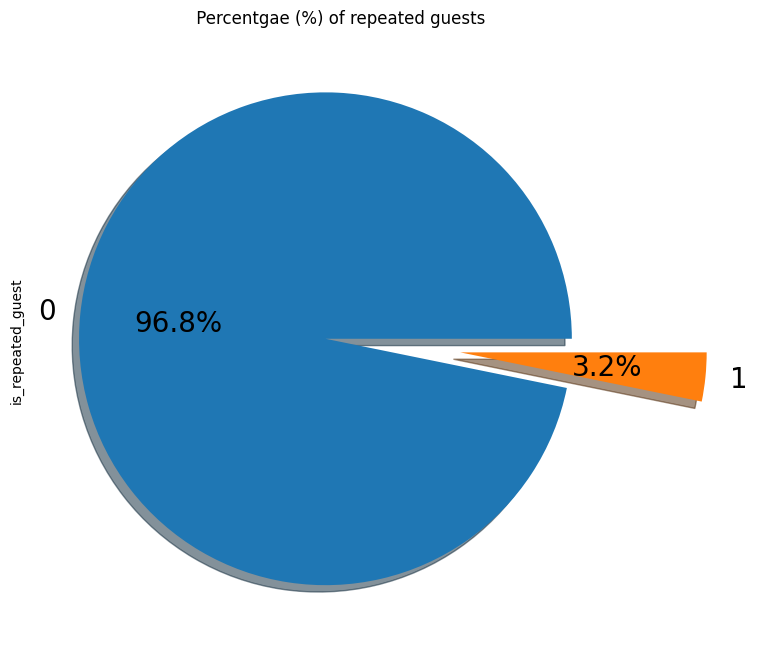

In [21]:
df['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.5),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")

# **Observation:**
Repeated guests are very few which only 3.9 %.</br>
*In order to retained the guests management should take feedbacks from guests and try to imporve the services.*

# **(4)What is the percentage distribution of required_car_parking_spaces?**

In [22]:
print(df.required_car_parking_spaces.value_counts())

0    111590
1      7277
2        28
3         3
Name: required_car_parking_spaces, dtype: int64


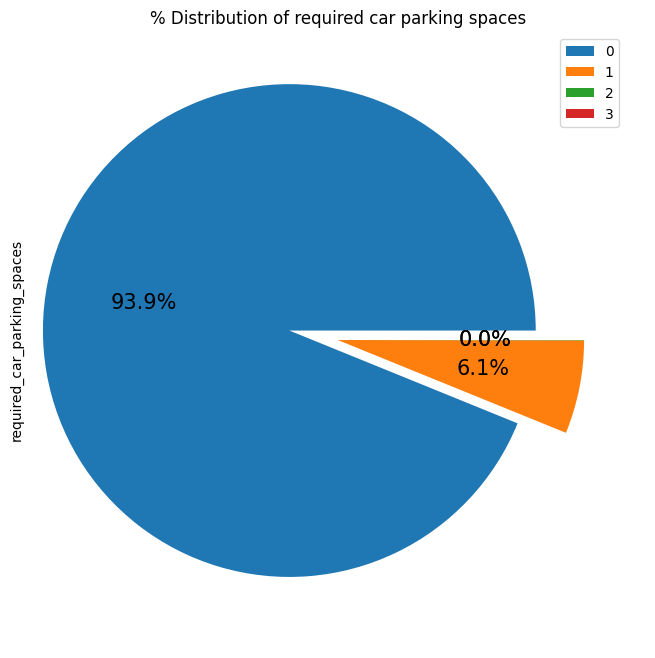

In [23]:
myexplode = [0.2, 0, 0, 0]
df['required_car_parking_spaces'].value_counts().plot.pie(explode=myexplode, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# **Observation**
*91.6 % guests did not required the parking space. 
</br>only 8.3 % guests required only 1 parking space.*

# **5)What is the percentage of booking changes made by the customer.?**

Text(0, 0.5, 'Percentage(%)')

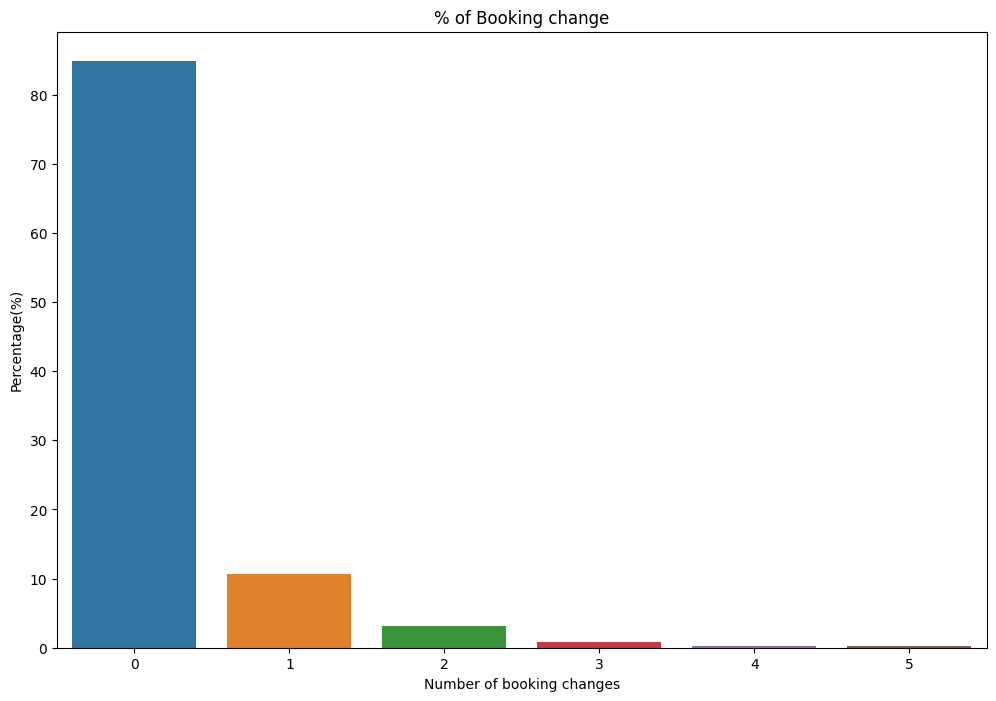

In [24]:
booking_changes_df=df['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')
     

0= 0 changes made in the booking</br>
1= 1 changes made in the booking</br>
2= 2 changes made in the booking
# **Observation**
*Almost 82% of the bookings were not changed by guests.*

# **6)What is Percentage distribution of Deposite type ?**

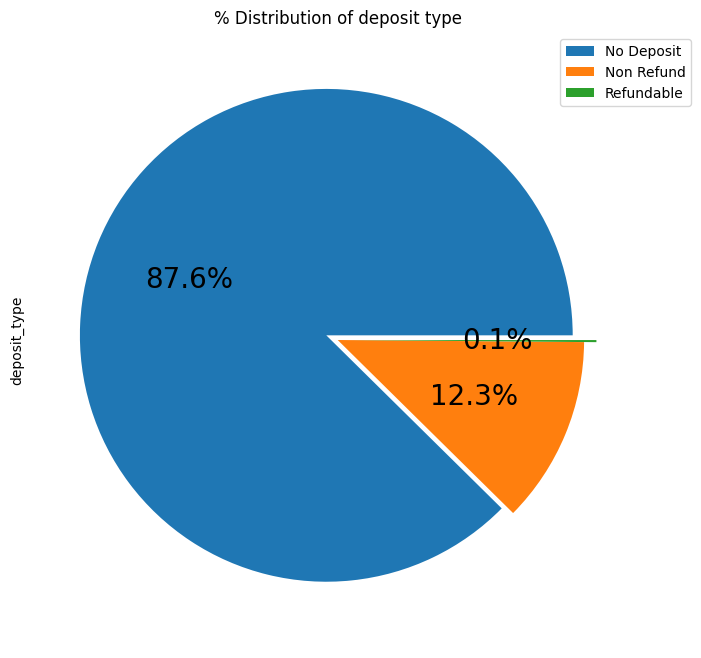

In [25]:
df['deposit_type'].value_counts().plot.pie(explode=(0.05,0,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=df['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# **Observation**
*98.7 % of the guests prefer "No deposit" type of deposit.*

# **7) Which type of food is mostly preferred by the guests?**

In [26]:
df.meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

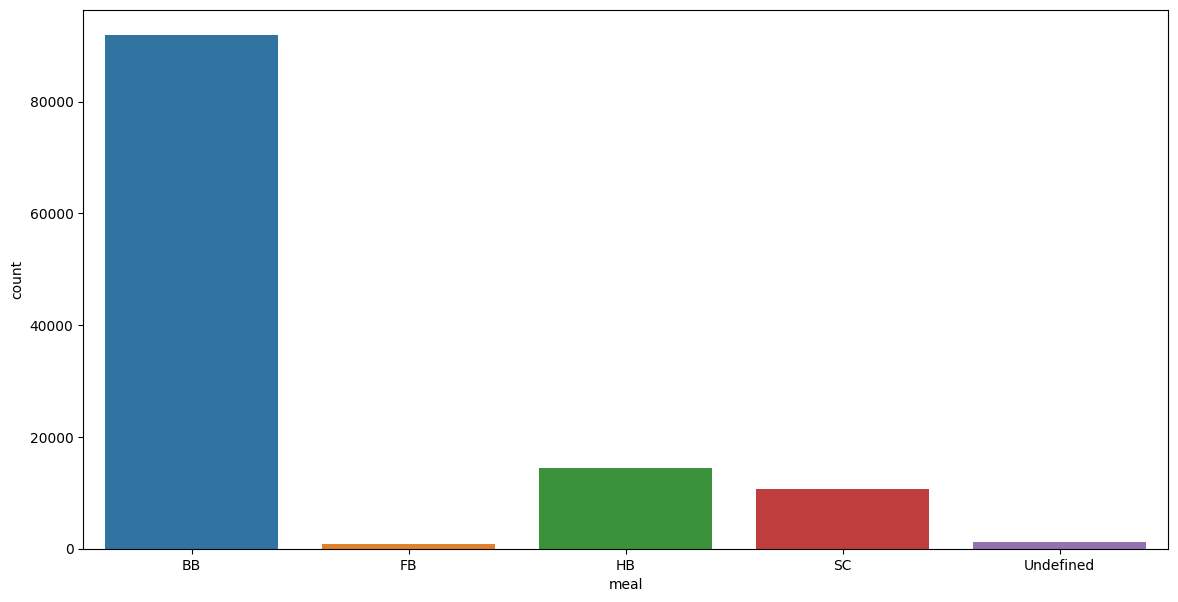

In [27]:
plt.figure(figsize=(14,7))
sns.countplot(x='meal',data=df)
plt.show()

Types of meal in hotels:

* BB - (Bed and Breakfast)</br>
*  HB- (Half Board)</br>
*  FB- (Full Board)</br>
*  SC- (Self Catering)</br>

# **Observation**
So the most preferred meal type by the guests is BB( Bed and Breakfast)</br>
HB- (Half Board) and SC- (Self Catering) are equally preferred.

# **8) From which country the most guests are coming?**

> Indented block



In [28]:
df.country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

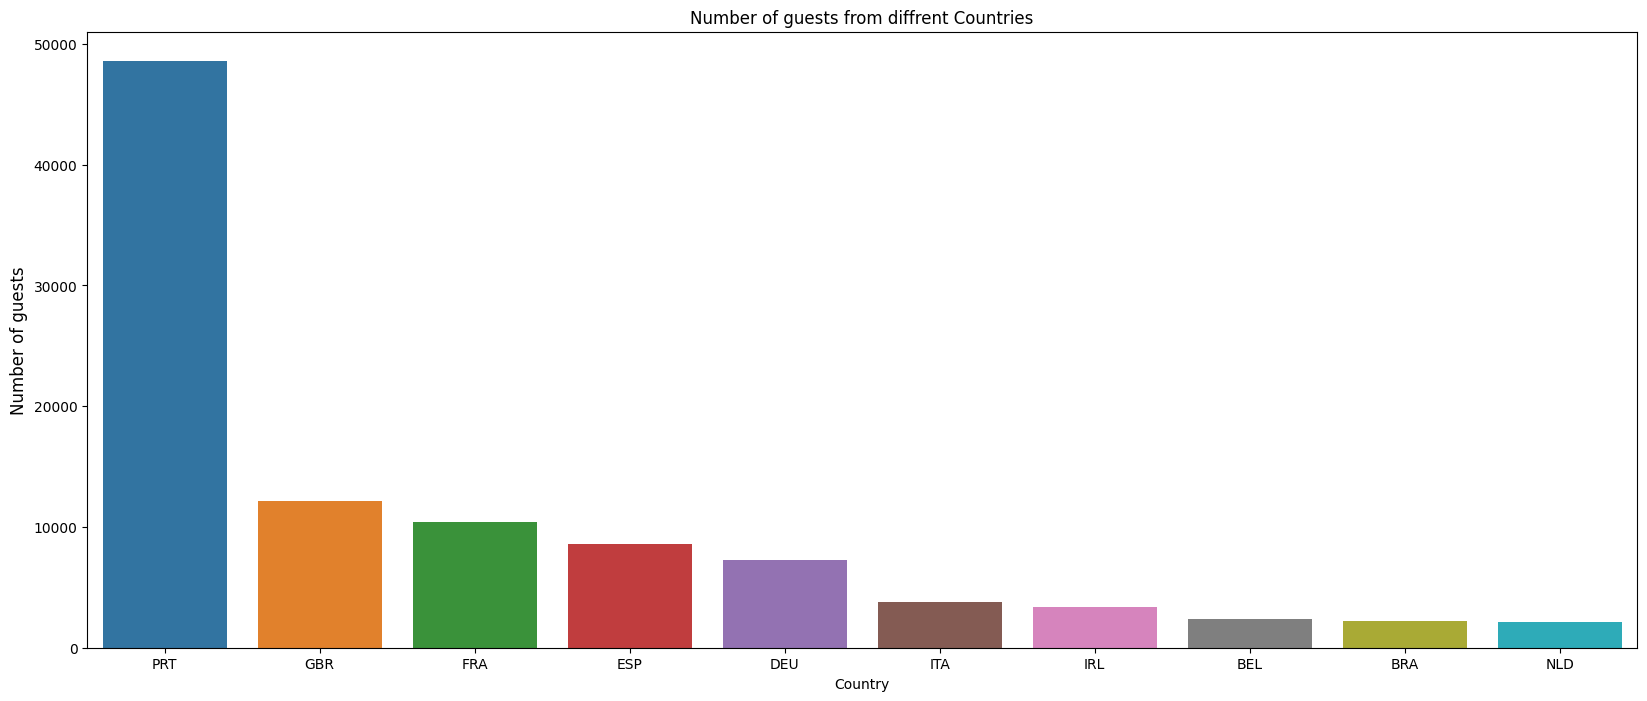

In [29]:

# Counting the guests from various countries.
country_df=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
# country_df1=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")
     

# **Observation**
Most of the guests are coming from portugal i.e more 25000 guests are from portugal
abbreevations for countries-
PRT- Portugal</br>
GBR- United Kingdom</br>
FRA- France</br>
ESP- Spain</br>
DEU - Germany</br>
ITA -Itlay</br>
IRL - Ireland</br>
BEL -Belgium</br>
BRA -Brazil</br>
NLD-Netherlands



# **9) Which is the most preferred room type by the customers?**

Text(0.5, 1.0, 'Most preferred Room type')

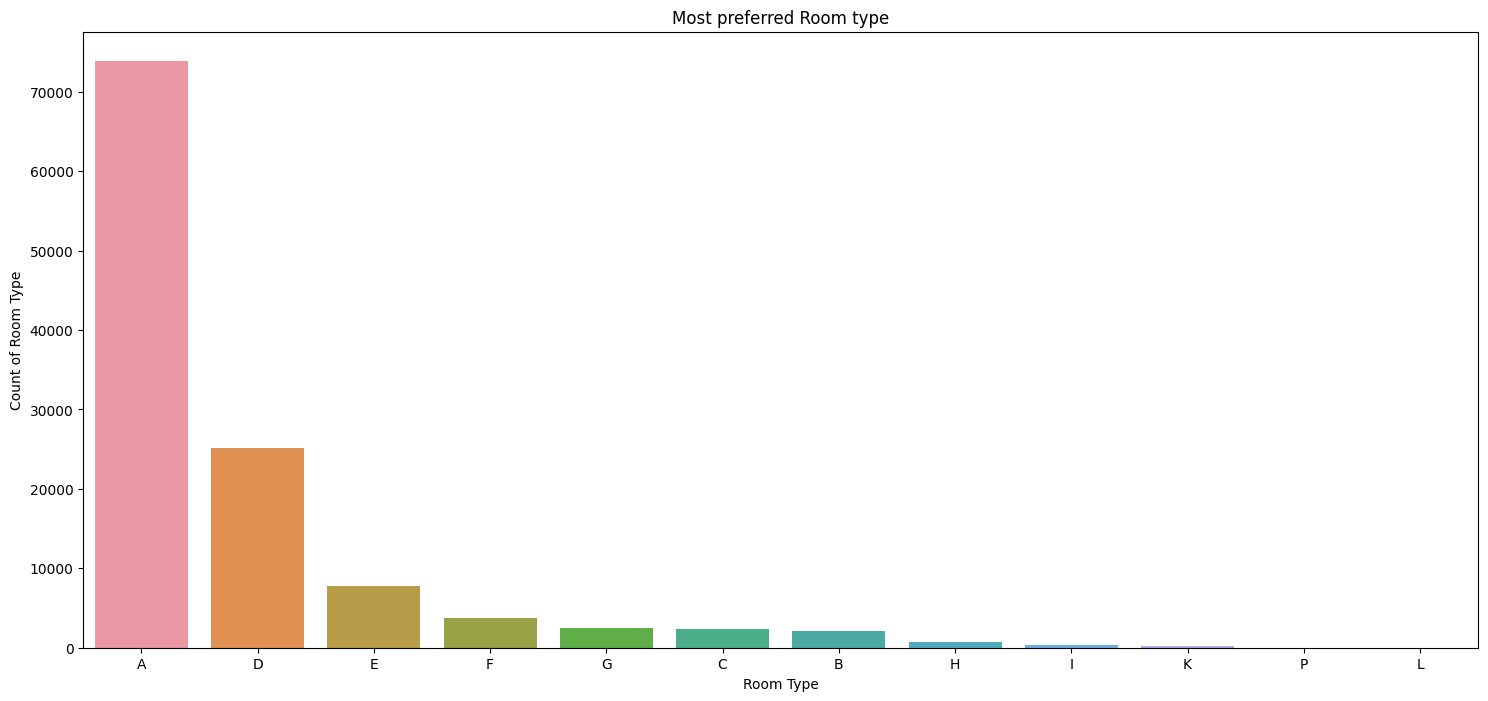

In [30]:
#set plotsize
plt.figure(figsize=(18,8))

#plotting 
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")

# **Observation**
So the most preferred Room type is "A".

# **10)In which month most of the bookings happened?**

In [31]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,5874
3,February,8012
7,March,9739
0,April,11045
8,May,11779
6,June,10927
5,July,12628
1,August,13852
11,September,10467
10,October,11095


Text(0, 0.5, 'Number of bookings')

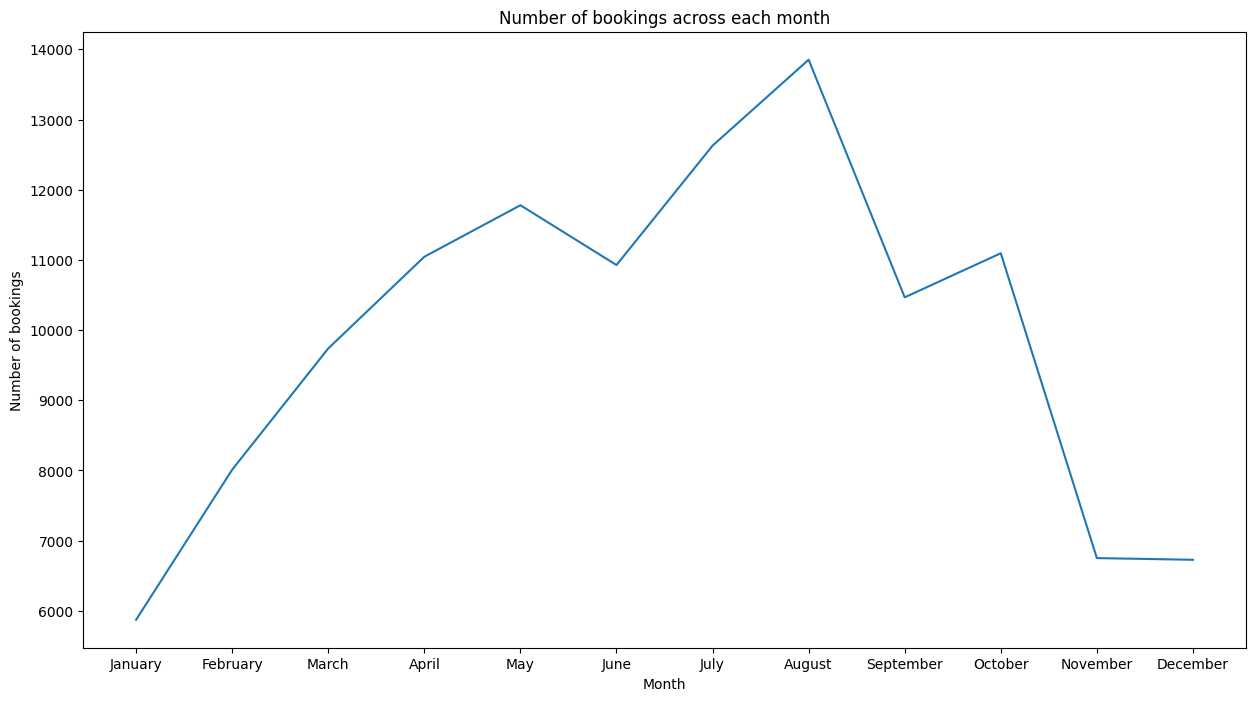

In [32]:
# set plot size
plt.figure(figsize=(15,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

# **Observation**
*July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.*

# **11) Which year had the highest bookings?**

Text(0.5, 1.0, 'Year Wise bookings')

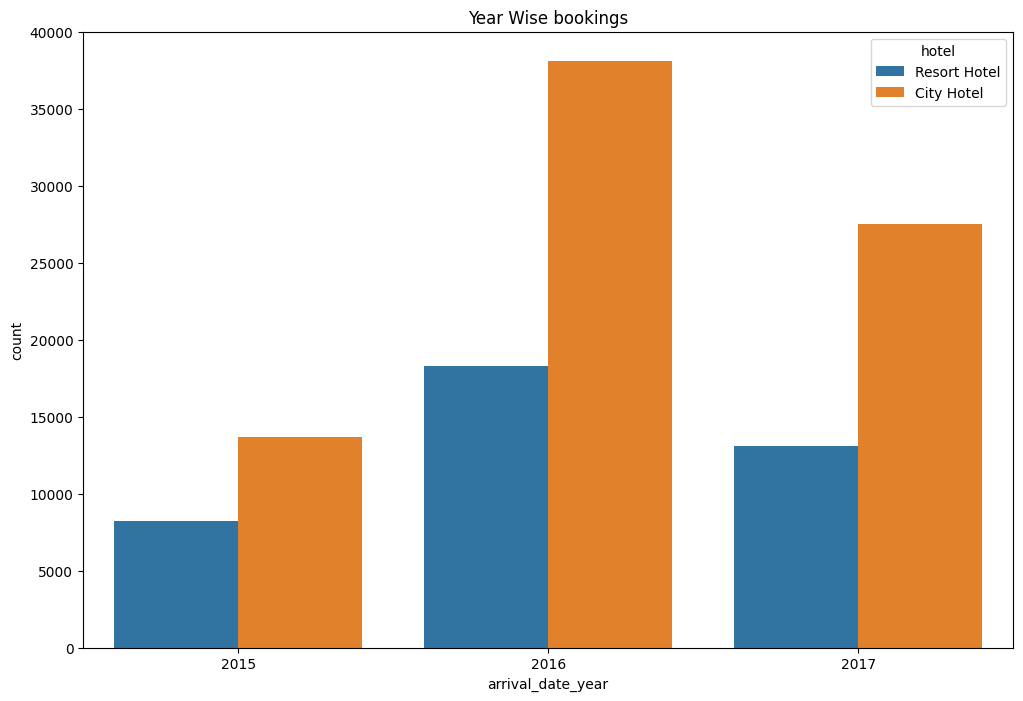

In [33]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df['arrival_date_year'],hue=df['hotel'])
plt.title("Year Wise bookings")

# **Observation**
2016 had the higest bookings.
2015 had less 7000 bookings.
overall City hotels had the most of the bookings.

# **Bivariate and Multivariate Analysis**


In [34]:
grup_by_hotel=df.groupby('hotel')

# **1) Which Hotel type has the highest ADR?**

<Axes: title={'center': 'Avg ADR of each Hotel type'}, xlabel='hotel', ylabel='adr'>

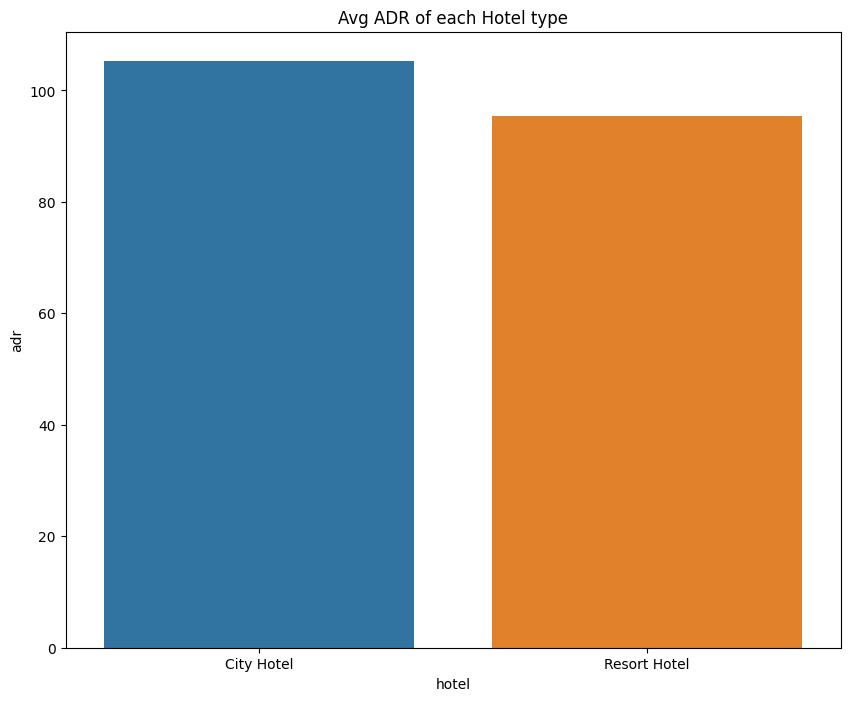

In [35]:

#grouping by hotel adr
highest_adr=grup_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

# **Observation**
City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

# **2) Which hotel type has the more lead time?**


Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

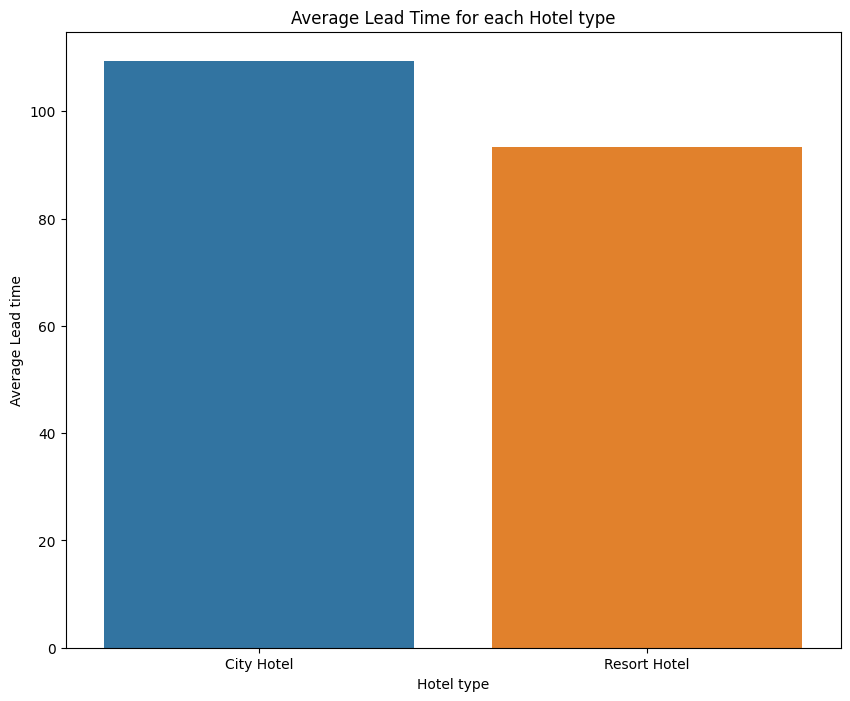

In [39]:
#group by hotel and taking mean of lead time
avg_lead_time=grup_by_hotel['lead_time'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# plot the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
# set lables
plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")


# **Observation**
*Resort hotels has slightly high avg lead time. That means customers plan their trips very early.*

# **(3)ADR across the different month.**

In [43]:
#groupby
bookings_by_months_df=df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,82.628986
9,January,Resort Hotel,49.673157
6,February,City Hotel,85.088278
7,February,Resort Hotel,55.445661
15,March,Resort Hotel,57.802130
14,March,City Hotel,91.961790
0,April,City Hotel,111.311363
1,April,Resort Hotel,78.144752
17,May,Resort Hotel,78.820186
16,May,City Hotel,121.638560


Text(0, 0.5, 'ADR')

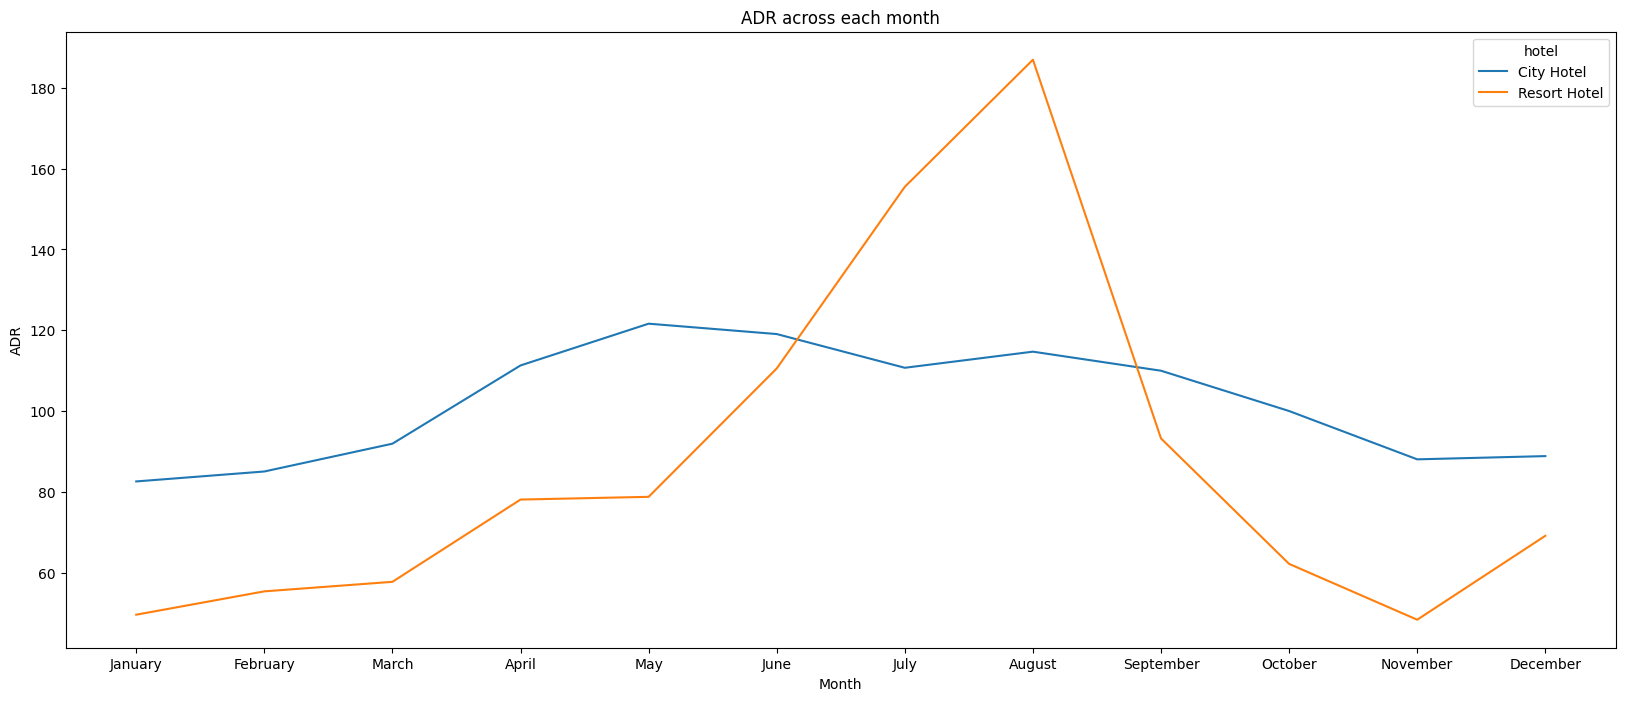

In [44]:

# set plot size and plot the line
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

# **Observation**
*For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.*

*The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.*

# **4)Which distribution channel contributed more to adr in order to increase the the income.?**

Text(0.5, 1.0, 'ADR across Distribution channel')

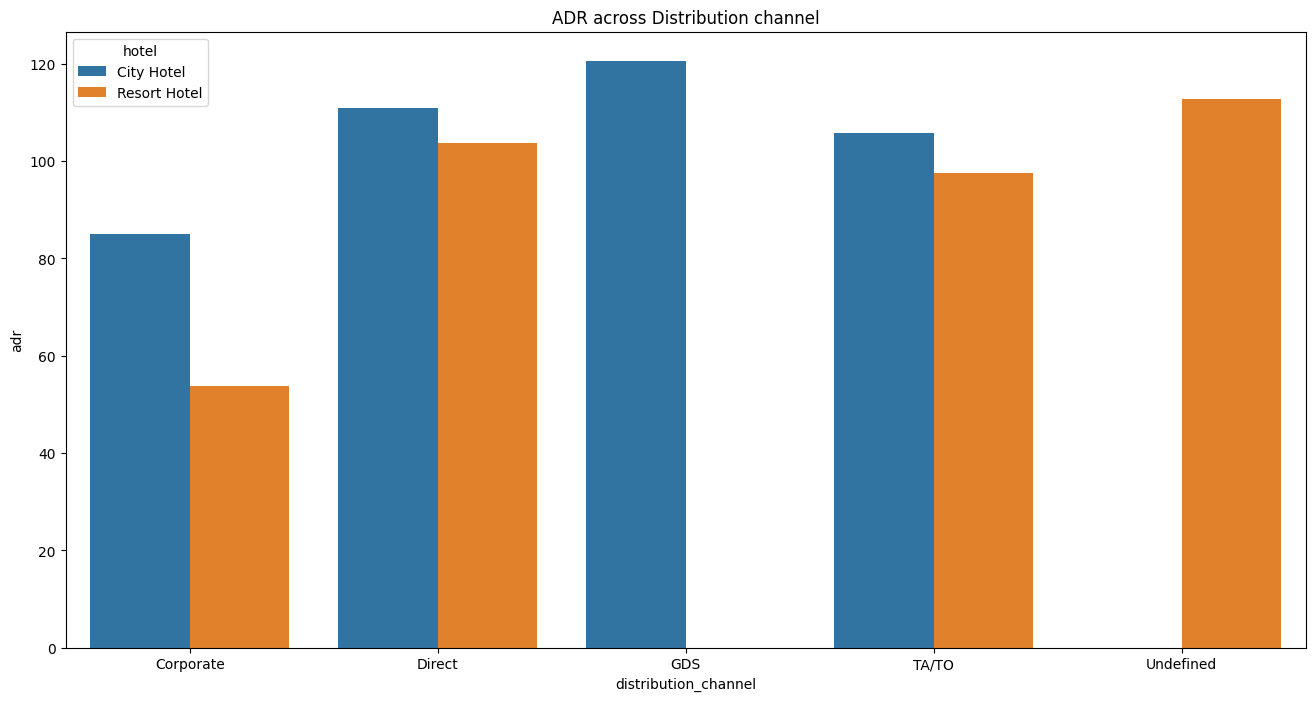

In [45]:
# group by distribution channel and hotel
distribution_channel_df=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

Corporate- These are corporate hotel booing companies which makes bookings
possible.

GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.</br>
Direct- means that bookings are directly made with the respective hotels</br>
TA/TO- means that booings are made through travel agents or travel operators.
Undefined- Bookings are undefined. may be customers made their bookings on arrival.
# **Observation**
From the plot is clear that
'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.</br>
GDS has highly contributed in adr in 'City Hotel' type.
GDS needs to increase Resort Hotel bookings. *italicised text*

# **5) Does the guests alloted with the same room type which was reserved by them?**



In [53]:

# Define a function for the reserved room type is same  or not as  assigned room type
def same_room_allotment(x):
  '''function to check whether the reserved room 
  type is same  or not as  assigned room type'''

  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0  


([<matplotlib.axis.XTick at 0x7f7f3eb20e80>,
 [Text(0, 0, 'Not canceled'), Text(1, 0, 'canceled')])

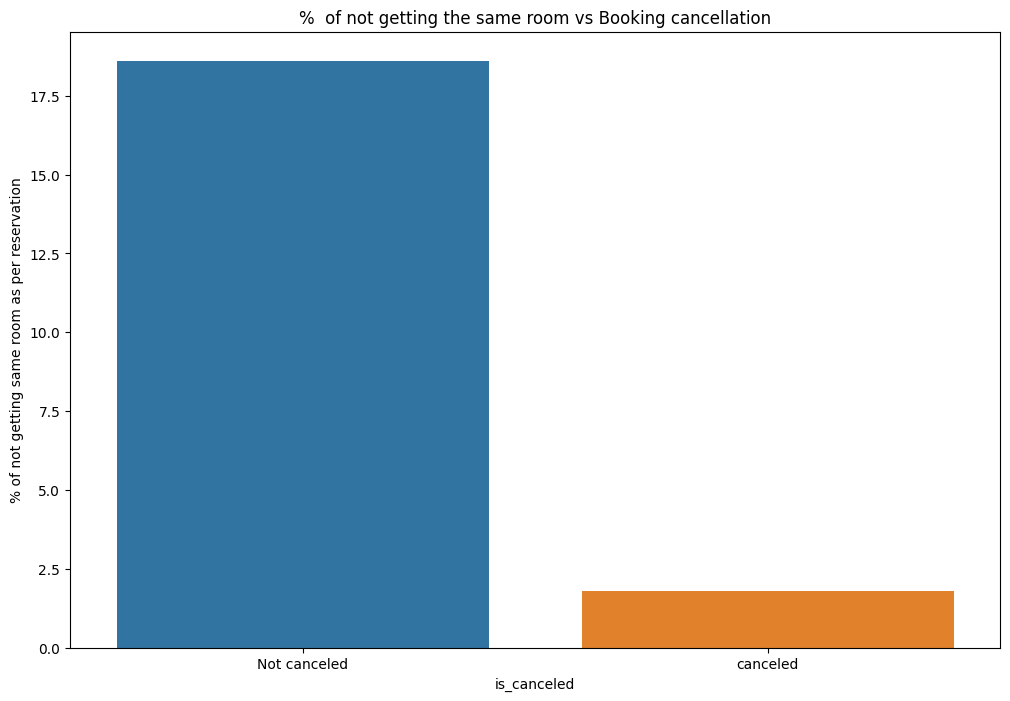

In [57]:
# create new column to df1
df['Same_room_alloted_or_not']=df.apply(lambda x: same_room_allotment(x),axis=1)

#groupby is canceled
grp_by_canceled_df=df.groupby('is_canceled')

# create DF and calculate  percentage of same room alloted  or not
DF=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
DF

#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x=DF.index,y=DF['percentage'])

# set labels
plt.title('%  of not getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['Not canceled','canceled'])

# **Obseravtion**
*Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.*

# **(6)ADR across different market segment**

Text(0.5, 1.0, 'Adr across market segment')

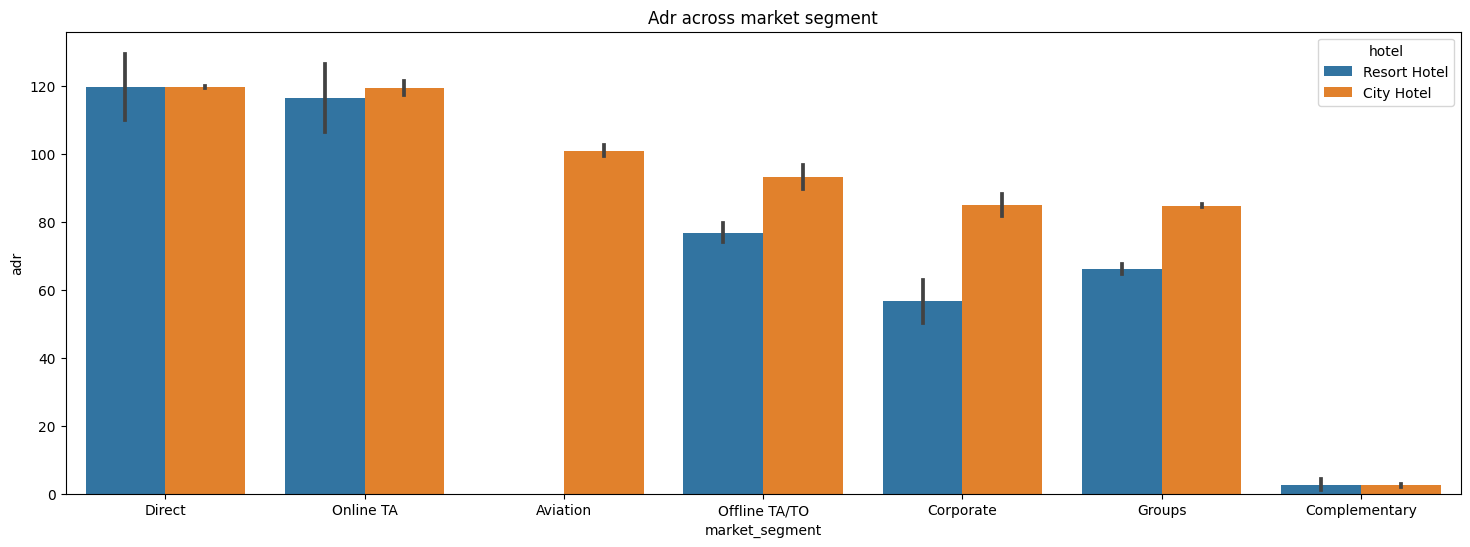

In [59]:
Grupby=df.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

# set plot size and plto barchart
plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')


# **Obseravtion**
'Direct' and 'Online TA' are contributing the most in both types of hotels.</br>
Aviation segment should focus on increasing the bookings of 'City Hotel'

# **Correlation of the columns**

Text(0.5, 1.0, 'Co-relation of the columns')

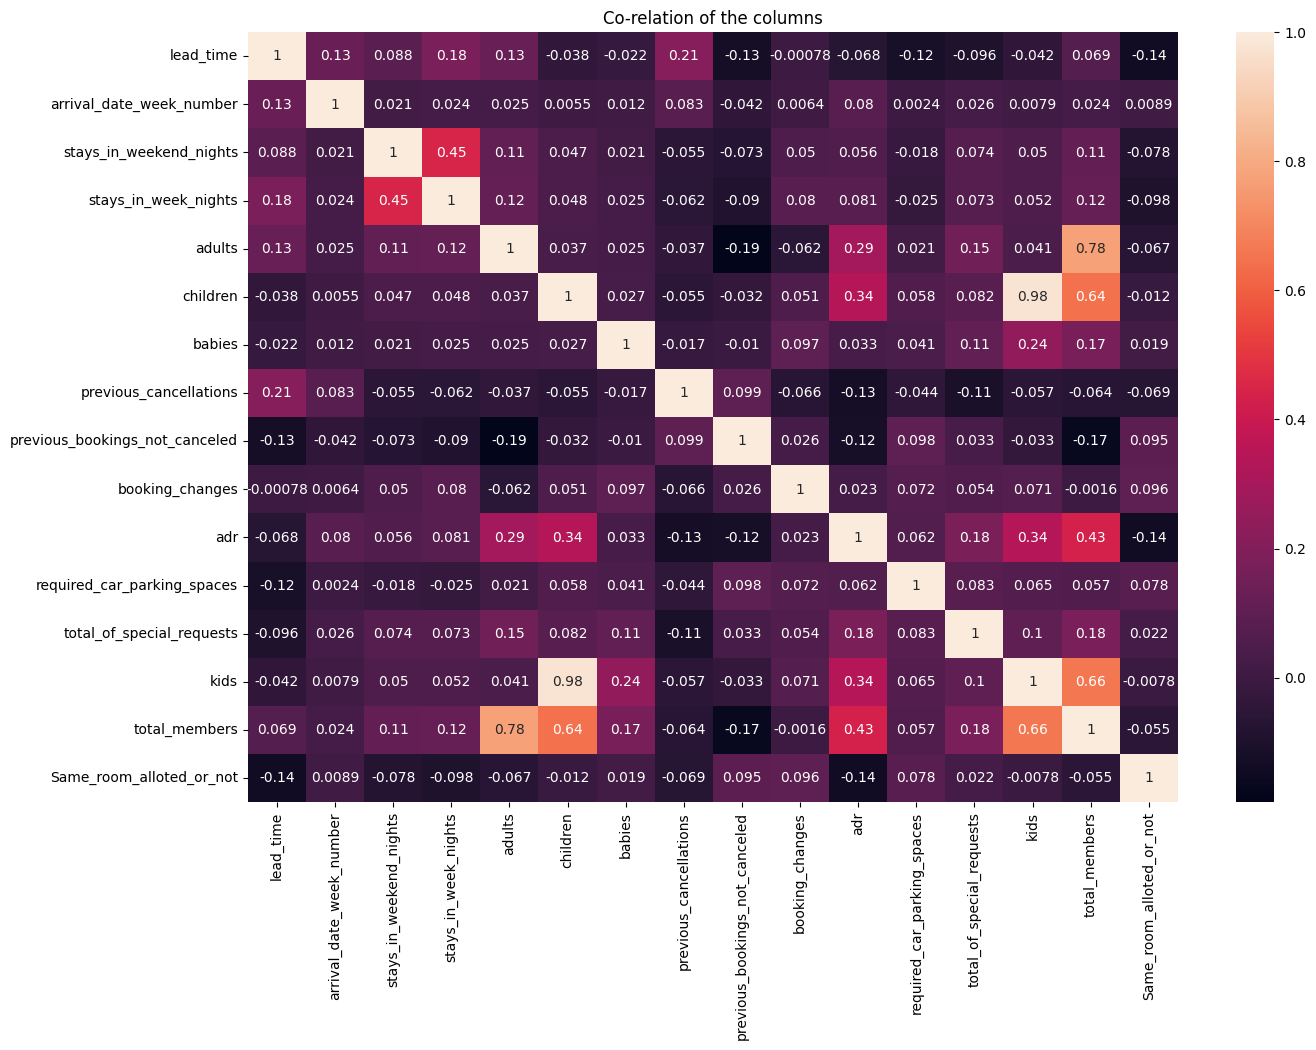

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')

# **Relationship between the repeated guests and previous bookings not canceled.?**




In [68]:
repeated_guests_df=df[df['is_repeated_guest']==1]
repeated_guests_df_1=df[df['is_repeated_guest']==0]

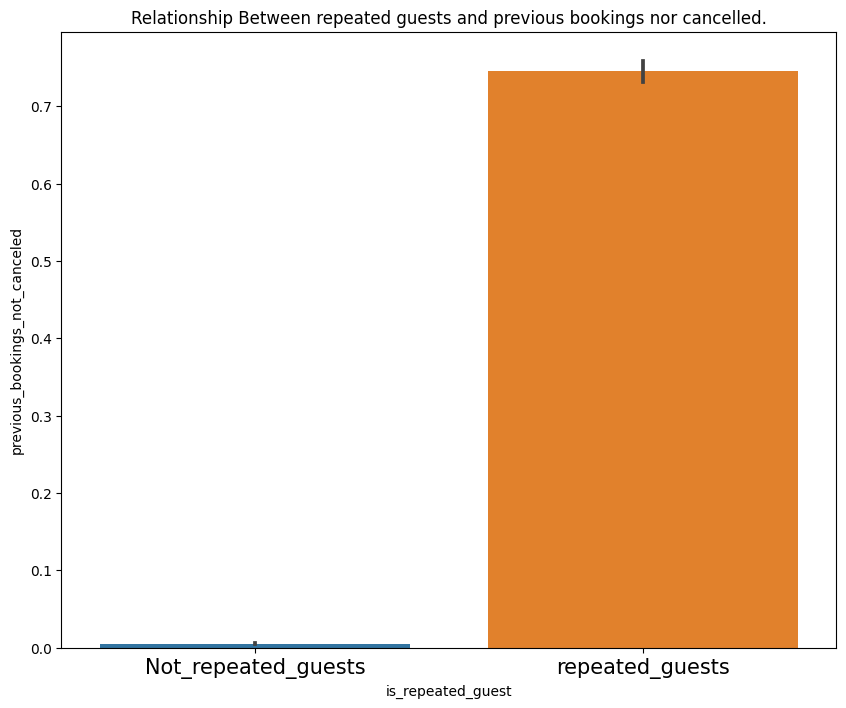

In [69]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['is_repeated_guest'],y= df['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()

# **Observation**
*Not Repeated guests are more likely to cancel their bookings.*

In [73]:
df.drop(df[df['adr'] > 5000].index, inplace = True)


# **Conclusions:**

City hotels are the most preferred type of hotel by guests, and they are also the busiest.</br>
However, the retention rate for both types of hotels is low, with only 3.9% of guests revisiting the same hotel.</br>
Most guests do not require car parking spaces, and the majority of bookings are made through travel agents/tour operators.</br>
Bed & Breakfast is the most preferred meal type by guests.</br>
The highest number of guests are from Portugal, and most bookings for both city and resort hotels were made in 2016.</br>
City hotels generate more revenue than resort hotels, but they also have a higher booking cancellation rate at almost 30%.</br>
Resort hotels have more repeat guests and a longer average lead time, while city hotels have a longer waiting time period, indicating higher demand.</br>
The optimal stay for both types of hotels is less than 7 days, with guests typically staying for a week.</br>
Almost 19% of guests did not cancel their bookings even after not getting the same room they reserved, while only 2.5% cancelled their booking.